**Python version:**  3.x

### Variabili da Inizializzare

In [1]:
# set the output file name
outFileName = 'Out_File_Name'


# set the path of the directory where your modules are
modulesPath = 'C:\\Users\\loren\\Documents\\Progetti\\Scuola\\AdvDataMining\\__Repo__'

#### Moduli

In [2]:
import os
import sys

if os.path.isdir(modulesPath) and modulesPath not in sys.path:
    sys.path.append(modulesPath)

modulesList = os.listdir(modulesPath)
print('Available Files and Modules for the project:', modulesList,sep='\n')

%matplotlib inline

import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.model_selection import RandomizedSearchCV

import file_handling
import data_understanding
import data_preparation
import model_evaluation

Available Files and Modules for the project:
['datatest.txt', 'datatest2.txt', 'datatraining.txt', 'data_preparation.py', 'data_understanding.py', 'file_handling.py', 'machine_learning.py', 'model_evaluation.py', '__pycache__']


In [3]:
df = file_handling.setup_df('datatraining.txt')

In [4]:
X_train, X_test, y_train, y_test = file_handling.setup_df('datatraining.txt', 'Occupancy', 'datatest.txt')

In [5]:
del X_train['date']
del X_test['date']

# \Decision Tree Classifier\

In [6]:
from sklearn.tree import DecisionTreeClassifier

### Variabili da Inizializzare

In [7]:
#seleziona il modello
model = DecisionTreeClassifier()

# per conoscere tutti i possibili iper-parametri del modello:
model.get_params(deep=False)

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [8]:
#setta il range in cui devono essere cercati gli iper-parametri migliori peril modello

params_domain_dic = {'min_samples_leaf': range(1,150)}


#setta il numero di terazioni che l'algoritmo Random Search deve eseguire per trovare i parametri migliori

iterN = 100

## Ricerca dei migliori Iper-Parametri

In [9]:
search = RandomizedSearchCV(model, param_distributions=params_domain_dic, n_iter=iterN, scoring='f1_macro', random_state=0)

search.fit(X_train, y_train)

best_params = search.best_params_
print('Best values for searched parameters: ', best_params, sep='\n')

clf = search.best_estimator_

Best values for searched parameters: 
{'min_samples_leaf': 134}


## Validazione del Modello

In [10]:
model_evaluation.classifier_validate(clf, X_train, y_train)

Accuracy at a 95 percent confidence interval: 0.98 (+/- 0.05)

F1 Score at a 95 percent confidence interval: 0.97 (+/- 0.06)


## Test del modello

Accuracy: 0.9786116322701689

F1-score: [0.98290855 0.97142857]

Average F1-score: 0.977168558577854

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665




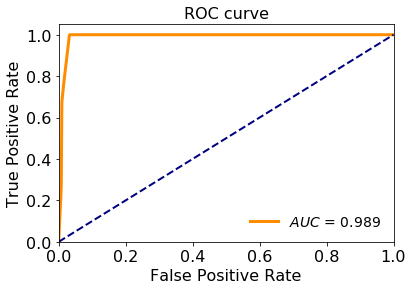

In [11]:
model_evaluation.classifier_test(clf, X_test, y_test)

# \K-NN\

In [12]:
from sklearn.neighbors import KNeighborsClassifier

### Variabili da Inizializzare

In [13]:
#seleziona il modello
model = KNeighborsClassifier()

# per conoscere tutti i possibili iper-parametri del modello:
model.get_params(deep=False)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [14]:
#setta il range in cui devono essere cercati gli iper-parametri migliori peril modello

params_domain_dic = {'n_neighbors': range(1,30),
                    'weights': ['uniform', 'distance']}

#setta il numero di terazioni che l'algoritmo Random Search deve eseguire per trovare i parametri migliori

iterN = 50

## Ricerca dei migliori Iper-Parametri

In [15]:
search = RandomizedSearchCV(model, param_distributions=params_domain_dic, n_iter=iterN, scoring='f1_macro', random_state=0)

search.fit(X_train, y_train)

best_params = search.best_params_
print('Best values for searched parameters: ', best_params, sep='\n')

clf = search.best_estimator_

Best values for searched parameters: 
{'weights': 'uniform', 'n_neighbors': 27}


## Validazione del Modello

In [16]:
model_evaluation.classifier_validate(clf, X_train, y_train)

Accuracy at a 95 percent confidence interval: 0.97 (+/- 0.04)

F1 Score at a 95 percent confidence interval: 0.96 (+/- 0.06)


## Test del modello

Accuracy: 0.9782363977485928

F1-score: [0.98259304 0.97097097]

Average F1-score: 0.9782363977485928

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665




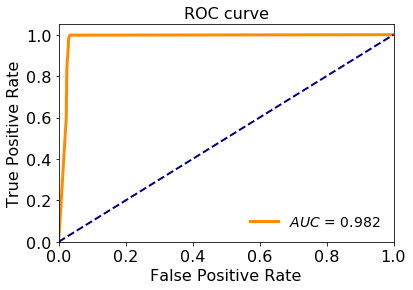

In [17]:
model_evaluation.classifier_test(clf, X_test, y_test)

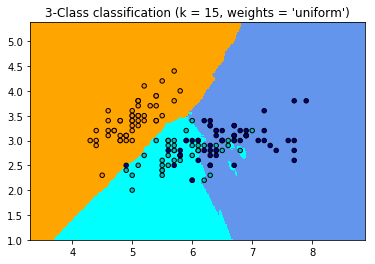

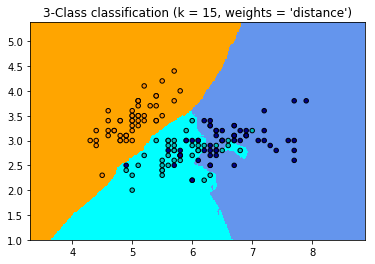

In [21]:
from sklearn import datasets
from matplotlib.colors import ListedColormap

n_neighbors = 15

# import some data to play with
iris = datasets.load_iris()

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# \Naive Bayes\

In [21]:
from sklearn.naive_bayes import GaussianNB#, CategoricalNB

In [22]:
#seleziona il modello
clf = GaussianNB()

#fitta il modello
clf.fit(X_train, y_train)

GaussianNB(priors=None)

## Validazione del Modello

In [24]:
model_evaluation.classifier_validate(clf, X_train, y_train)

Accuracy at a 95 percent confidence interval: 0.96 (+/- 0.05)

F1 Score at a 95 percent confidence interval: 0.95 (+/- 0.07)


## Test del modello

Accuracy: 0.9774859287054409

F1-score: [0.98201439 0.96990973]

Average F1-score: 0.9774859287054409

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      0.99      0.97       972

avg / total       0.98      0.98      0.98      2665




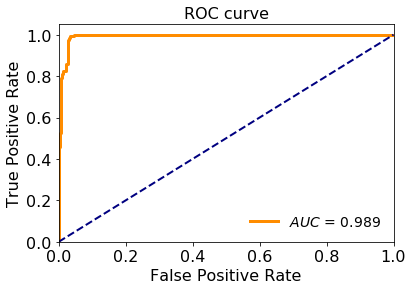

In [23]:
model_evaluation.classifier_test(clf, X_test, y_test)

# \Logistic Regression\

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
#seleziona il modello
clf = LogisticRegression(random_state=0)

#fitta il modello
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Validazione del Modello

In [28]:
model_evaluation.classifier_validate(clf, X_train, y_train)

Accuracy at a 95 percent confidence interval: 0.99 (+/- 0.03)

F1 Score at a 95 percent confidence interval: 0.98 (+/- 0.04)


## Test del modello

Accuracy: 0.9782363977485928

F1-score: [0.98260348 0.97094188]

Average F1-score: 0.9782363977485928

             precision    recall  f1-score   support

          0       1.00      0.97      0.98      1693
          1       0.95      1.00      0.97       972

avg / total       0.98      0.98      0.98      2665




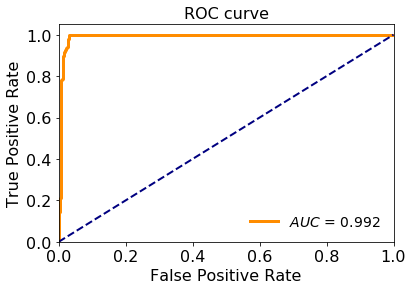

In [27]:
model_evaluation.classifier_test(clf, X_test, y_test)

In [36]:
from scipy.special import expit

In [37]:
loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Churn', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

TypeError: ufunc 'multiply' did not contain a loop with signature matching types dtype('<U32') dtype('<U32') dtype('<U32')

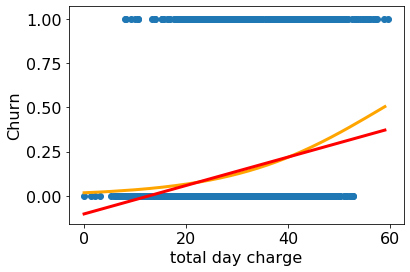

In [74]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * clf.coef_ + clf.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Churn', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

# \Linear Regression\

In [112]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

In [113]:
#seleziona il modello
reg = LinearRegression()

#fitta il modello
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [118]:
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [-1.76594886e-01 -7.88539501e-02  1.82402626e-03  2.28693893e-04
  5.15981641e+02]
Intercept: 
 3.5328828861652832


## Test del modello

In [119]:
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

NameError: name 'r2_score' is not defined

## Validazione del Modello

In [116]:
best_model_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

print('Accuracy at a 95 percent confidence interval: %0.2f (+/- %0.2f)' % (
    best_model_scores.mean(), best_model_scores.std() * 2), end='\n\n')


best_model_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='f1_macro')

print("F1 Score at a 95 percent confidence interval: %0.2f (+/- %0.2f)" % (
    best_model_scores.mean(), best_model_scores.std() * 2))

Accuracy at a 95 percent confidence interval: 0.99 (+/- 0.03)

F1 Score at a 95 percent confidence interval: 0.98 (+/- 0.04)


## Linear Regression in 2 dimensions

In [49]:
reg = LinearRegression()
reg.fit(X_train.T[0].reshape(-1, 1), y_train)
y_pred = reg.predict(X_test.T[0].reshape(-1, 1))

print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.146
MSE: 203.480
MAE: 10.608


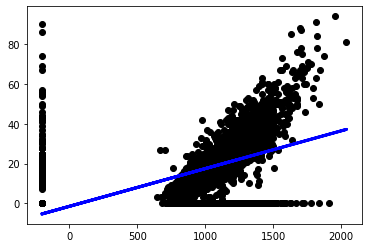

In [50]:
plt.scatter(X_test.T[0], y_test,  color='black')
plt.plot(X_test.T[0], y_pred, color='blue', linewidth=3)
plt.show()

# Lasso

In [51]:
reg = Lasso()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 0.00637757  0.01403048  0.          0.01389165  0.04359241  0.00330828
 -0.00647338  0.00776205 -0.00226357 -0.11463657 -0.05754968 -0.        ]
Intercept: 
 -13.43231189414249


In [52]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.766
MSE: 55.627
MAE: 4.841


# Ridge

In [53]:
reg = Ridge()
reg.fit(X_train, y_train)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 4.99391141e-03  1.41771928e-02  7.10606658e-01 -8.46072287e-03
  4.25016184e-02 -5.48746979e-04 -4.84048599e-03  9.39821156e-03
 -2.35159601e-03 -1.40437295e-01 -7.54395111e-02 -5.50414444e-01]
Intercept: 
 4.881201263343142


In [54]:
y_pred = reg.predict(X_test)
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

R2: 0.765
MSE: 56.017
MAE: 4.776


# Slides Example

Coefficients: 
 [58.87472632]
Mean squared error: 3.40
Coefficient of determination: 0.93
1.432665401644528


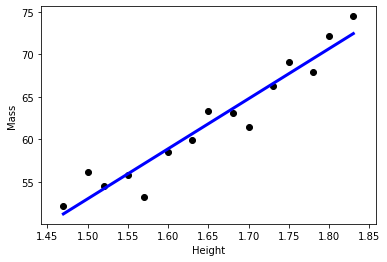

In [55]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model

Height = np.array([1.47, 1.50, 1.52, 1.55, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.78, 1.80, 1.83])
Mass = np.array([52.21, 56.12, 54.48, 55.84, 53.20, 58.57, 59.93, 63.29, 63.11, 61.47, 66.28, 69.10, 67.92, 
                 72.19, 74.46])

diabetes_X_train = Height
diabetes_y_train = Mass

diabetes_X_test = Height
diabetes_y_test = Mass

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train.reshape(-1, 1), diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test.reshape(-1, 1))

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))
print(mean_absolute_error(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)
plt.xlabel('Height')
plt.ylabel('Mass')

#plt.xticks(())
#plt.yticks(())

plt.show()

# Output Files

In [12]:
#df.to_csv(path_or_buf = modulesPath + '\\' + outFileName + '.csv', sep=',', encoding='utf-8', index=False)